# <center><span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px">🔥🔥EDA & Model Building of Titanic DataSet🔥🔥</span></center>

#### <center><span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px">If you find this notebook useful or interesting, please, support with an upvote :)</span></center>

<center><img style="border-radius:10px" src="https://c4.wallpaperflare.com/wallpaper/621/139/660/night-ice-uk-transatlantic-steamer-titanic-hd-wallpaper-preview.jpg" alt="titanic image"/></center>

## <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px">Short intro about Titanic</span>

<p><span style="color:#023e8a;font-weight:bold">RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of a superliner or cruise ship. RMS Titanic was the largest ship afloat at the time she entered service and the second of three Olympic-class ocean liners operated by the White Star Line.</span></p>

<p><span style="color:#023e8a;font-weight:bold">The Titanic was on her maiden voyage, a return trip from Britain to America. The outward route was to be Southampton, England – Cherbourg, France – Queenstown, Ireland – New York, USA.</span></p>

## <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px">Table of Content</span>

* [**<span style="color:#023e8a;">1. Import necessary libraries</span>**](#imports)
* [**<span style="color:#023e8a;">2. Load the dataset & basic info</span>**](#load_dataset)
* [**<span style="color:#023e8a;">3. EDA</span>**](#eda)
* [**<span style="color:#023e8a;">4. Prepare the DataSet for the model building</span>**](#prepare_data)
* [**<span style="color:#023e8a;">5. Model building</span>**](#model_building)

## <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px">Necessary files (dataset) path</span>
* **<span style="color:#023e8a">/kaggle/input/titanic/train.csv</span>**
* **<span style="color:#023e8a">/kaggle/input/titanic/test.csv</span>**
* **<span style="color:#023e8a">/kaggle/input/titanic/gender_submission.csv</span>**

# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="imports">1. Import necessary libraries</span>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="load_dataset">2. Load the dataset & basic info</span>

### <center><span style="color:white;font-weight:bolder;background-color:#023e8a;padding:7px;border-radius:7px">Data dictionary</span></center>

| <span style="color:#023e8a;font-weight:bolder">Column Name</span> | <span style="color:#023e8a;font-weight:bolder">Defination</span> | <span style="color:#023e8a;font-weight:bolder">Key</span> |
| :-- | :-- | :-- |
| <span style="color:#023e8a;font-weight:bold">Survived</span> | <span style="color:#023e8a;">Survival</span> | <span style="color:#023e8a;">0=No, 1=Yes</span> |
| <span style="color:#023e8a;font-weight:bold">Pclass</span> | <span style="color:#023e8a;">Ticket class</span> | <span style="color:#023e8a;">1 = 1st, 2 = 2nd, 3 = 3rd</span> |
| <span style="color:#023e8a;font-weight:bold">Name</span> | <span style="color:#023e8a;">Name of the passengers</span> | |
| <span style="color:#023e8a;font-weight:bold">Sex</span> | <span style="color:#023e8a;">Gender of the passengers</span> | |
| <span style="color:#023e8a;font-weight:bold">Age</span> | <span style="color:#023e8a;">Age of the passengers</span> | |
| <span style="color:#023e8a;font-weight:bold">SibSp</span> | <span style="color:#023e8a;"># of siblings / spouses aboard the Titanic</span> | |
| <span style="color:#023e8a;font-weight:bold">Parch</span> | <span style="color:#023e8a;"># of parents / children aboard the Titanic</span> | |
| <span style="color:#023e8a;font-weight:bold">Ticket</span> | <span style="color:#023e8a;">Ticket number</span> | |
| <span style="color:#023e8a;font-weight:bold">Fare</span> | <span style="color:#023e8a;">Passenger fare</span> | |
| <span style="color:#023e8a;font-weight:bold">Cabin</span> | <span style="color:#023e8a;">Cabin number</span> | |
| <span style="color:#023e8a;font-weight:bold">Embarked</span> | <span style="color:#023e8a;">Port of Embarkation</span> | <span style="color:#023e8a;">C = Cherbourg, Q = Queenstown, S = Southampton</span> |

In [2]:
df = pd.read_csv("data/train.csv")
df = df.drop(columns=["PassengerId"], axis=1)

In [3]:
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': 'background-color: #000066; color: white'
#     'props': [('background-color', '#ffffb3'; 'color')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}

styles = df.sample(10).style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").set_caption("10 sample records from the dataset.")
styles

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
478,0,3,"Karlsson, Mr. Nils August",male,22.000000,0,0,350060,7.520800,nan,S
506,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.000000,0,2,26360,26.000000,nan,S
192,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.000000,1,0,350046,7.854200,nan,S
382,0,3,"Tikkanen, Mr. Juho",male,32.000000,0,0,STON/O 2. 3101293,7.925000,nan,S
187,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.000000,0,0,111428,26.550000,nan,S
455,1,3,"Jalsevac, Mr. Ivan",male,29.000000,0,0,349240,7.895800,nan,C
840,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.925000,nan,S
124,0,1,"White, Mr. Percival Wayland",male,54.000000,0,1,35281,77.287500,D26,S
210,0,3,"Ali, Mr. Ahmed",male,24.000000,0,0,SOTON/O.Q. 3101311,7.050000,nan,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.979200,B30,C


In [4]:
print("\033[1mSome basic information about the dataset.\033[0m\n")

df.info()

Some basic information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


<span style="color:#023e8a;font-weight:bolder">Total 891 records are there. And can see that "Age", "Cabin" have large number of missing values. Also "Embarked" has 2 missing values. Also can see the datatypes of every features. But for now, lets see how much % these features have missing values.</span>

# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="eda">3. Exploratory Data Analysis</span>

In [5]:
def highlight_10_per_missing(s):
    '''
    highlight yellow is value is greater than mean else red.
    '''
    is_max = s > 10
    return ['background-color: #c600de; color: white' if i else None for i in is_max]

total_missing = pd.DataFrame(df.isnull().sum() / df.shape[0] * 100, columns=["%"])
total_missing.style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").apply(highlight_10_per_missing).set_caption("Missing values to every column in terms of %")

,%
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000
Cabin,77.104377


<span style="color:#023e8a;font-weight:bolder">Surprising but interesting result! "Age" and "Cabin" have lots of missing values, 19.87% and 77.10% respectively which is huge. Next let's see some statistical values by simply calling *describe()* method.</span>

In [6]:
df.describe().style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").set_caption("Some basic statistical values of the dataset.")

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<span style="color:#023e8a;font-weight:bolder">The "Survived" column is categorical column, that's why these values have no meaning. Same as for the column "Pclass" (which holds some ordinal values). Average age of the passengers are around 30 years and minimum age is 0.42 years (It could be new born baby or also can be a bias). Some interesting facts also happend with the "Fare" column. Minimum fare is 0 (surprising) and maximum is 512. The difference is lots. Also there is a huge gap between maximum fare price and the average fare. And from the columns "SibSp" and "Parch", we can tell that most of the passengers were travelling along.</span>

In [7]:
print("Unique values of 'Parch' column:")
print(df["Parch"].unique(), "\n")
print("Unique values of 'SibSp' column:")
print(df["SibSp"].unique(), "\n")
df.corr().iloc[2::3][["Age", "Fare"]].style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").apply(highlight_10_per_missing).set_caption("Pearson Corr of Age and Fare columns")  # Pearson Corr

Unique values of 'Parch' column:
[0 1 2 5 3 4 6] 

Unique values of 'SibSp' column:
[1 0 3 4 2 5 8] 



,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


<span style="color:#023e8a;font-weight:bolder">On the above cell, we are doing Pearson correlation. As we can see that the "SibSP" and "Parch" column has no continuous values, there are invalid for this type of correlation matrix. Same reason with the "Survived", "Pclass" columns. And according to the result, we can tell that there is no linear relationship between the two columns "Age" and "Fare".</span>


<span style="color:white;font-weight:bolder;background-color:#023e8a;padding:7px;border-radius:7px;font-size:20px">Pearson Correlation Formula</span>

$$\Large Covariance \ (c) = \frac{1}{n-1}\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}$$

$$\Large Correlation \ (r) = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum_{i=1}^{n}{(x_i - \bar{x})^2} \sum_{i=1}^{n}{(y_i - \bar{y})^2}}}$$

<span style="color:#023e8a;font-weight:bolder;font-size:16px">P-Value of correlation coefficient:</span>
$$\Large t_{n-2} = \frac{r\sqrt{n-2}}{1-r^2}$$

<b style="color:#023e8a;font-weight:bolder;font-size:16px">Limitations of Pearson Correlation:</b>
- <span style="color:#023e8a;font-weight:bolder">1. Pearson correlation can over or under represent relationships if the two features contain nonlinearities or outliers.</span>
- <span style="color:#023e8a;font-weight:bolder">2. Pearson correlation is appropriate for narmally distributed data.</span>


<span style="color:white;font-weight:bolder;background-color:#023e8a;padding:7px;border-radius:7px;font-size:20px">Spearman (rank) Correlation</span>

<b style="color:#023e8a;font-weight:bolder;font-size:16px">Info:</b>
- <span style="color:#023e8a;font-weight:bolder">Spearman's rho tests for a monotonic relationship regardless of whether the relationship is linear or nonlinear.</span>
- <span style="color:#023e8a;font-weight:bolder">A monotonic relationship tests for increasing or decreasing numbers, regardless of the spacing between numbers.</span>


<span style="color:#023e8a;font-weight:bolder;font-size:16px">How to compute the Spearman correlation:</span>
- <span style="color:#023e8a;font-weight:bolder">Step 1: Transform both variables/features to rank. E.g., ([3321654, -40, 1, 0] => [4, 1, 3, 2])</span>
- <span style="color:#023e8a;font-weight:bolder">Step 2: Compute Pearson correlation coefficient on ranks.</span>
- <span style="color:#023e8a;font-weight:bolder">P-Value: Same as for "regular" Pearson coefficient.</span>





In [8]:
# Spearman correlation
df.corr(method="spearman").iloc[2::3][["Age", "Fare"]].style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").set_caption("Spearman corr between Age and Fare column")

,Age,Fare
Age,1.000000,0.135051
Fare,0.135051,1.000000


<span style="color:#023e8a;font-weight:bolder">Now we have got a different result with Spearman Correlation compared to Pearson Correlation. By comparing the two results, we can say that there is a slight nonlinear relationship between "Age" and "Fare" column. But the relationship is not so strong.</span>

<span style="color:white;font-weight:bolder;background-color:#023e8a;padding:7px;border-radius:7px;font-size:20px">Kendall's Correlation</span>

<b style="color:#023e8a;font-weight:bolder;font-size:16px">Info:</b>
- <span style="color:#023e8a;font-weight:bolder">Used for ordinal data (numerical meaningful order, but no fixed relationship across the levels).</span>
- <span style="color:#023e8a;font-weight:bolder">Examples: education, movie ratings</span>

<span style="color:#023e8a;font-weight:bolder">We can do Kendall's Correlation between the "Pclass", "Parch", "SibSp" columns because these are the only Ordinal data. "Name", "Sex", "Embarked" are nominal data. So lets do the Kendall's Correlation.</span>

In [9]:
corr1 = df.corr(method="kendall").iloc[1:4:2][["Pclass", "SibSp", "Parch"]]
corr2 = df.corr(method="kendall").iloc[4:-1][["Pclass", "SibSp", "Parch"]]

pd.concat([corr1, corr2], axis=0).style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").set_caption("Kendall's Corr for the Ordinal columns")

,Pclass,SibSp,Parch
Pclass,1.000000,-0.039552,-0.021019
SibSp,-0.039552,1.000000,0.425241
Parch,-0.021019,0.425241,1.000000


<span style="color:#023e8a;font-weight:bolder">From the result we can say that there is no relationship between the columns "Pclass" and "SibSp". Same situation was made with "Pclass" and "Parch". But there is a kind off strong relationship between "Parch" and "SibSp". These two columns tells a story of the passengers' family.</span>

<span style="color:#023e8a;font-weight:bolder">Next, we can convert the "Sex" column to numeric by using the LabelEncoder() class of Scikit Learn library. Also we can do feature engineering by adding the "SibSP" and "Parch" column together because together these 2 columns can say how much family were travelling with a passenger. So gave this new feature as "family". To know more how to do it, expand the code cells.</span>

In [10]:
# Label encoding to the gender column
gender_le = LabelEncoder()
df["Sex"] = gender_le.fit_transform(df["Sex"])

In [11]:
# feature engineering: count total family members travelled in Titanic
df["family"] = df["SibSp"] + df["Parch"]
df.sample(10).style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").set_caption("10 sample records from the dataset after the operations.")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
737,1,1,"Lesurer, Mr. Gustave J",1,35.000000,0,0,PC 17755,512.329200,B101,C,0
832,0,3,"Saad, Mr. Amin",1,nan,0,0,2671,7.229200,nan,C,0
752,0,3,"Vande Velde, Mr. Johannes Joseph",1,33.000000,0,0,345780,9.500000,nan,S,0
296,0,3,"Hanna, Mr. Mansour",1,23.500000,0,0,2693,7.229200,nan,C,0
584,0,3,"Paulner, Mr. Uscher",1,nan,0,0,3411,8.712500,nan,C,0
846,0,3,"Sage, Mr. Douglas Bullen",1,nan,8,2,CA. 2343,69.550000,nan,S,10
102,0,1,"White, Mr. Richard Frasar",1,21.000000,0,1,35281,77.287500,D26,S,1
666,0,2,"Butler, Mr. Reginald Fenton",1,25.000000,0,0,234686,13.000000,nan,S,0
270,0,1,"Cairns, Mr. Alexander",1,nan,0,0,113798,31.000000,nan,S,0
765,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",0,51.000000,1,0,13502,77.958300,D11,S,1


<span style="color:#023e8a;font-weight:bolder;font-size:18px">Now lets have a look on "Pclass" & "Survived" columns by plotting bar chart:</span>

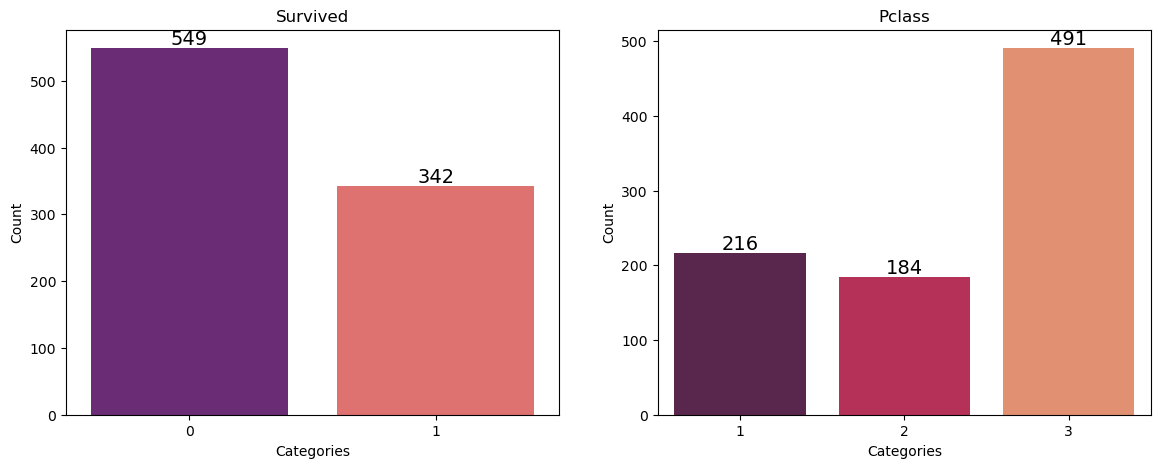

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

data_survived = df["Survived"].value_counts()
data_survived.index

bar_ax = sns.barplot(x=data_survived.index, y=data_survived, palette="magma", ax=axs[0])
for i in bar_ax.containers:
    bar_ax.bar_label(i, rotation=0, fontsize = 14)
    
axs[0].set_title("Survived")
axs[0].set_xlabel("Categories")
axs[0].set_ylabel("Count")

data_pclass = df["Pclass"].value_counts()
bar_ax = sns.barplot(x=data_pclass.index, y=data_pclass, ax=axs[1], palette="rocket")

for i in bar_ax.containers:
    bar_ax.bar_label(i, rotation=0, fontsize = 14)
    
axs[1].set_title("Pclass")
axs[1].set_xlabel("Categories")
axs[1].set_ylabel("Count")

plt.show()

<span style="color:#023e8a;font-weight:bolder">From the first plot, we can see that most of the passengers (549 passengers) have died and 342 passengers have survived. We can say that the dataset is kind off imbalanced type where one category have many records than the other one. And most surprising things we can see in the second plot. Most passengers are belongs to passenger class 3. The interesting thing is that there are less passengers belongs to class 2 than passenger class 1. It could happen because the difference of fares between passenger class 1 is slightly more than the passenger class 2. So those who had wished to travel in passenger class 2, had booked the passenger class 1. But there is a large difference of fares between passenger class 3 and passenger class 2. That's why there is no exception here.</span>

<span style="color:#023e8a;font-weight:bolder;font-size:18px">Now lets have a look on the distribution of "Age" & a scatter plot between "Age" and "Pclass" w.r.t. "Survived" column:</span>

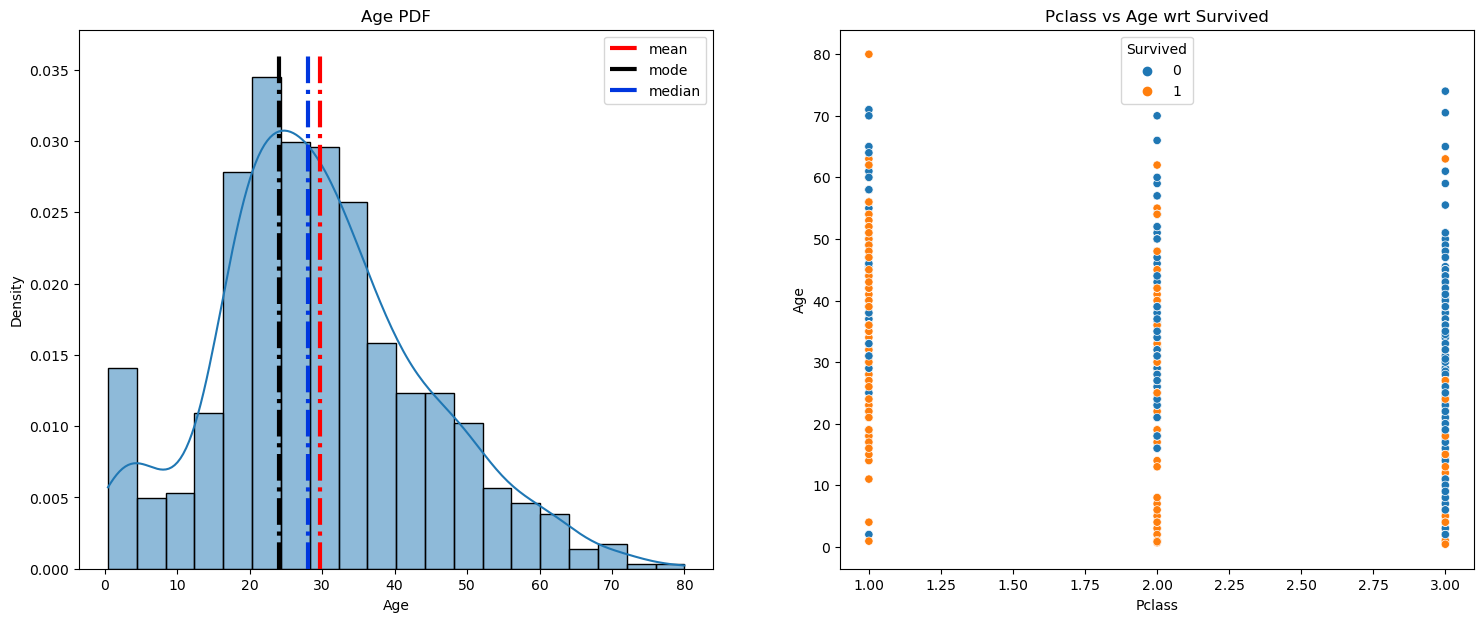

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

mean = df["Age"].mean()
mode = df["Age"].mode()
median = df["Age"].median()

sns.histplot(df["Age"], stat="density", kde=True, ax=axs[0])
axs[0].plot([mean, mean], [0, 0.036], "r-.", label="mean", linewidth=3)
axs[0].plot([mode, mode], [0, 0.036], "-.", color="#000000", label="mode", linewidth=3)
axs[0].plot([median, median], [0, 0.036], "-.", color="#0036de", label="median", linewidth=3)
axs[0].set_title("Age PDF")
axs[0].legend()

sns.scatterplot(x=df["Pclass"], y=df["Age"], hue=df["Survived"], ax=axs[1])
axs[1].set_title("Pclass vs Age wrt Survived")

plt.show()

<span style="color:#023e8a;font-weight:bolder">If we see the probability density function of the column "Age", the distribution is kind off right skewed. Most of the passengers belongs to 18 to 35 years. Also these is a bump (0 - 7 years) which tells that many children were travelling. We want to do some statistical measures, then median or mode can be a right fit. You can change the distribution by applying some function transformation (e.g., log transformation) or power transformation (e.g., Box-Cox transformation & Yeo-Johnson transformation).</span>

<span style="color:#023e8a;font-weight:bolder">In the second plot, we have done some scatter plot between "Pclass" and "Age" column w.r.t "Survived" column. For passenger class 1, the old passengers (around >=57 years) didn't survived. For passenger class 3 and 2, very few childrens/teenegers had survived. So age can be a factor for survival but we can't say that this is a strong reason behind it. Because I think most of the passenger class 1 people had better opportunity than other passenger class 2. Or there might be other natural reasons or something else.</span>

<span style="color:#023e8a;font-weight:bolder;font-size:18px">Now time to visualize 2 scatter plots to compare "Age", "Fare", "Survived" & "Pclass" columns together:</span>

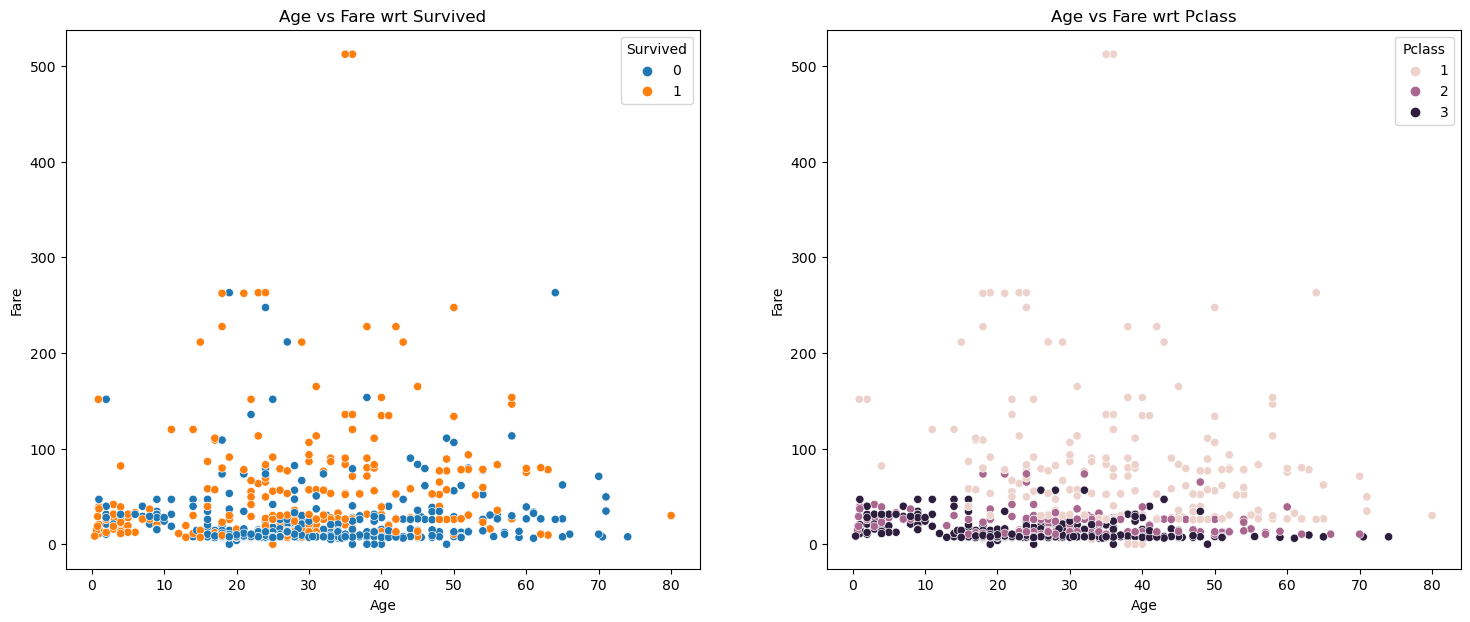

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, ax=axs[0])
axs[0].set_title("Age vs Fare wrt Survived")

sns.scatterplot(x="Age", y="Fare", hue="Pclass", data=df, ax=axs[1])
axs[1].set_title("Age vs Fare wrt Pclass")
plt.show()

<span style="color:#023e8a;font-weight:bolder">The story is kind of same here. For the first plot, we already saw that children and teenagers had survived. The fare could not effect these people. But with increasing the age with increasing the fare, we can see a difference. Those who had low fare ticket, could not survived and vice versa. The second plot tells the same story. The passenger class 1 people's ticket fare were high and had survived. And there was a opposite situation with passenger class 3 and passenger class 2. That's why to get the exact diferrences behind these stories, we have some more eda with the next 2 cells which are self-explanatory.</span>

In [15]:
print(f"Average age who survived: {df[df['Survived'] == 1]['Age'].mean()}")
print(f"Average age who can't survived: {df[df['Survived'] == 0]['Age'].mean()}")

Average age who survived: 28.343689655172415
Average age who can't survived: 30.62617924528302


In [16]:
for i in range(1, 4):
    percent = df[(df["Pclass"] == i) & (df["Survived"] == 0)].shape[0] / df[df["Pclass"] == i].shape[0] * 100
    age_died = df[(df["Pclass"] == i) & df["Survived"] == 0]["Age"].mean()
    age_survived = df[(df["Pclass"] == i) & df["Survived"] == 1]["Age"].mean()
    fare_died = df[(df["Pclass"] == i) & df["Survived"] == 0]["Fare"].mean()
    fare_survived = df[(df["Pclass"] == i) & df["Survived"] == 1]["Fare"].mean()
    
    print(f"\33[5mPclass = {i}\033[0m")
    print(f"% died = {round(percent, 3)}")
    print(f"Avg age who can't survived = {round(age_died, 2)}")
    print(f"Avg age who have survived = {round(age_survived, 2)}")
    print(f"Avg fare who can't survived = {round(fare_died, 2)}")
    print(f"Avg fare who have survived = {round(fare_survived, 2)}")
    if i != 3: print("\n---------------------------------------------------\n")

Pclass = 1
% died = 37.037
Avg age who can't survived = 28.53
Avg age who have survived = 35.37
Avg fare who can't survived = 20.78
Avg fare who have survived = 95.61

---------------------------------------------------

Pclass = 2
% died = 52.717
Avg age who can't survived = 30.2
Avg age who have survived = 25.9
Avg fare who can't survived = 33.3
Avg fare who have survived = 22.06

---------------------------------------------------

Pclass = 3
% died = 75.764
Avg age who can't survived = 30.92
Avg age who have survived = 20.65
Avg fare who can't survived = 35.06
Avg fare who have survived = 13.69


<span style="color:#023e8a;font-weight:bolder;font-size:18px">Lets have a look on "Sex" & "Embarked" columns:</span>

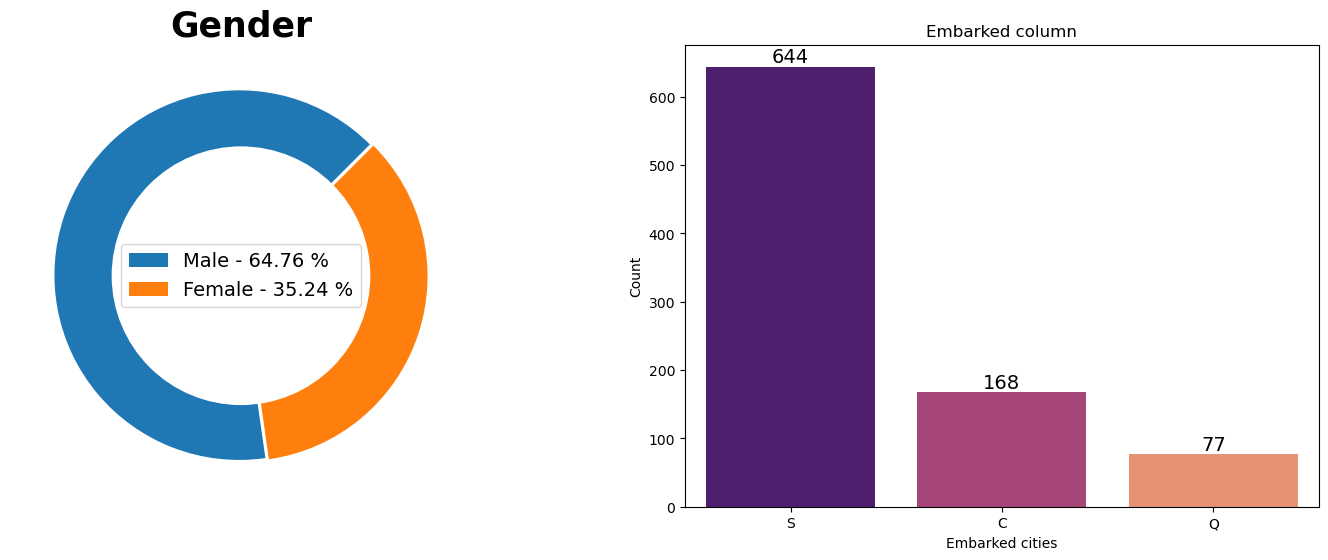

In [17]:
values = df["Sex"].value_counts()
keys = ["Male", "Female"]
total_records = df["Sex"].count()

labels = ["{0} - {1:1.2f} %".format(i, j/total_records * 100) for i, j in zip(keys, values)]
explodes = [0.02/len(keys) for i in range(len(keys))]

figure, axs = plt.subplots(1, 2, figsize = (18, 6))
# draw the pie chart
patches, texts = axs[0].pie(values, startangle = 45, explode = explodes, colors = None)
# draw the white circle in the middle of the pie chart
center_circle = Circle(xy = (0, 0), radius = 0.70, fc = "white")
axs[0].add_patch(center_circle)

axs[0].set_title("Gender", fontsize = 25, fontweight = "bold")
axs[0].legend(patches, labels, loc="center", fontsize = 14)

# for the 2nd plot
data_survived = df["Embarked"].value_counts()

bar_ax = sns.barplot(x=data_survived.index, y=data_survived, palette="magma", ax=axs[1])
for i in bar_ax.containers:
    bar_ax.bar_label(i, rotation=0, fontsize = 14)
    
axs[1].set_title("Embarked column")
axs[1].set_xlabel("Embarked cities")
axs[1].set_ylabel("Count")
plt.show()

<span style="color:#023e8a;font-weight:bolder">As we can see from the first plot, most passengers are male (around 64.76%) and few passengers are female (around 35.24%). Also we can see from the second plot that most passengers are belongs to the Southampton city, England. And very few passengers are came from the Queenstown city, France. I think this is obvious because Titanic had started her journey from Southamton, England, then Cherbourg, England and then Queenstown, France.</span>

# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="prepare_data">4. Prepare the dataset for model building</span>

<span style="color:#023e8a;font-weight:bolder">Quick glance at the dataset</span>

In [18]:
df.sample(10).style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").set_caption("10 sample records from the dataset.")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
134,0,2,"Sobey, Mr. Samuel James Hayden",1,25.000000,0,0,C.A. 29178,13.000000,nan,S,0
744,1,3,"Stranden, Mr. Juho",1,31.000000,0,0,STON/O 2. 3101288,7.925000,nan,S,0
350,0,3,"Odahl, Mr. Nils Martin",1,23.000000,0,0,7267,9.225000,nan,S,0
823,1,3,"Moor, Mrs. (Beila)",0,27.000000,0,1,392096,12.475000,E121,S,1
493,0,1,"Artagaveytia, Mr. Ramon",1,71.000000,0,0,PC 17609,49.504200,nan,C,0
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,nan,0,0,239854,0.000000,nan,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.000000,1,0,PC 17599,71.283300,C85,C,1
594,0,2,"Chapman, Mr. John Henry",1,37.000000,1,0,SC/AH 29037,26.000000,nan,S,1
827,1,2,"Mallet, Master. Andre",1,1.000000,0,2,S.C./PARIS 2079,37.004200,nan,C,2
153,0,3,"van Billiard, Mr. Austin Blyler",1,40.500000,0,2,A/5. 851,14.500000,nan,S,2


In [19]:
### Removing some columns because of:
# "Name": Text data and can say that every records are unique
# "Age": Because this column has 19.87% missing values
# "Cabin": Because this column has 77.10% missing values
# "SibSP" & "Parch": Because we have created a new column named "family"
# "Ticket": Lots of unique values in this column

df = df.drop(columns = ["Name", "Age", "Cabin", "Embarked", "SibSp", "Parch", "Ticket"])
df.sample(10).style.set_table_styles([cell_hover, index_names, headers]).set_properties(**{"background-color": "#023e8a","color":"white","border": "1.3px solid white"}).highlight_null(null_color="#c600de").set_caption("After dropping some features from the dataset:")

,Survived,Pclass,Sex,Fare,family
268,1,1,0,153.462500,1
472,1,2,0,27.750000,3
184,1,3,0,22.025000,2
735,0,3,1,16.100000,0
526,1,2,0,10.500000,0
579,1,3,1,7.925000,0
247,1,2,0,14.500000,2
316,1,2,0,26.000000,1
140,0,3,0,15.245800,2
46,0,3,1,15.500000,1


In [20]:
# Separate the depedent and independent variable 
X = df.iloc[:, 1:]
y = df["Survived"]

In [21]:
# create a trining set and test set. Training set will use for training the model and the test set will use
# for the evaluation of the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 4) (712,)
(179, 4) (179,)


# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="model_building">5. Model Building</span>

## <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" style="color:white">5.1. Logistic Regression</a></span>

<span style="color:#023e8a;font-weight:bolder">
Logistic regression is probably the most important supervised learning classification method. It’s a fast, versatile extension of a generalized linear model.
Logistic regression produces feature weights that are generally interpretable, which makes it especially useful when you need to be able to explain the reasons for a decision.</span>

### <span style="color:white;font-weight:bolder;background-color:#023e8a;padding:7px;border-radius:7px">**Regularization**</span>

<span style="color:#023e8a;font-weight:bolder">There are 3 types of regularization techniques:<span>
    
* **<span style="color:#023e8a;">1. L2 Regularization</span>**
* **<span style="color:#023e8a;">2. L1 Regularization</span>**
* **<span style="color:#023e8a;">3. ElasticNet</span>**

#### <span style="color:#023e8a;font-weight:bolder">**`l2` Regularization:**</span>
    
<span style="color:#023e8a;font-weight:bolder">It is used when usually all the features are important for the model building.</span>
    
$$\Large J = \frac{1}{n}\sum_{i=1}^{n}{L(y_i, \hat{y_i})} + \lambda||W||^2$$


#### <span style="color:#023e8a;font-weight:bolder">**`l1` Regularization:**</span>
<span style="color:#023e8a;font-weight:bolder">It is used when you know that some features are important for the model building.</span>

$$\Large J = \frac{1}{n}\sum_{i=1}^{n}{L(y_i, \hat{y_i})} + \lambda||W||$$

#### <span style="color:#023e8a;font-weight:bolder">**`elasticnet`:**</span>
<span style="color:#023e8a;font-weight:bolder">Combination of l2 and l1 regression.</span>

$$\Large J = \frac{1}{n}\sum_{i=1}^{n}{L(y_i, \hat{y_i})} + (a*l2 + b*l1)$$

$$\Large \lambda = a + b$$

$$\Large l1_{ratio} = \frac{a}{a+b}$$

### <span style="color:white;font-weight:bolder;background-color:#023e8a;padding:7px;border-radius:7px">**Optimization Algorithms:**</span>
    
<span style="color:#023e8a;font-weight:bolder">There are selevral optimation techniques that can be used in Scikit-Learn Logistic Regression algorithm. Sciikit-learn has five different solvers. Each solver tries to find the parameter weights that minimize a cost function.</span>

#### <span style="color:#023e8a;font-weight:bolder">**1. `newton-cg`:**</span>

<span style="color:#023e8a;font-weight:bolder">A newton method. Newton methods use an exact *Hessian matrix*. It's slow for large datasets, because it computes the second derivatives.</span>

#### <span style="color:#023e8a;font-weight:bolder">**2. `lbfgs`:**</span>
<span style="color:#023e8a;font-weight:bolder">Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. It isn't super fast with large data sets. It is the default solver in Scikit-Learn.</span>

#### <span style="color:#023e8a;font-weight:bolder">**3. `liblinear`:**</span>

<span style="color:#023e8a;font-weight:bolder">Library for Large Linear Classification. Uses a coordinate descent algorithm. Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. *In other words, it moves toward the minimum in one direction at a time.* It performs pretty well with high dimensionality. It does have a number of drawbacks. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.</span>

#### <span style="color:#023e8a;font-weight:bolder">**4. `sag`:**</span>

<span style="color:#023e8a;font-weight:bolder">Stochastic Average Gradient descent. A variation of gradient descent and incremental aggregated gradient approaches that uses a random sample of previous gradient values. Fast for big datasets.</span>

#### <span style="color:#023e8a;font-weight:bolder">**5. `saga`:**</span>

<span style="color:#023e8a;font-weight:bolder">Extension of `sag` that also allows for L1 regularization. Should generally train faster than sag.</span>

In [22]:
## Logistic Regression hyper-parameters:
# penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}. Default l2
# l1_ratio: only if penalty=elasticnet.
# solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}. Default lbfgs
# class_weight: dict or ‘balanced’. Default None.
# multi_class: {‘auto’, ‘ovr’, ‘multinomial’}
# n_jobs: Number of CPU cores used

In [23]:
df["Survived"].value_counts() / df["Survived"].shape[0] * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [24]:
## Let's see class_weight hyper-parameter. It can help us because we have imbalanced dataset.

In [25]:
# defining the model without specifying any class_weight parameter
logistic_reg = LogisticRegression(random_state = 72)
# training the model
logistic_reg.fit(X_train, y_train)
# prediction the model
y_pred_logistic = logistic_reg.predict(X_test)
# result of the model
accuracy_score(y_test, y_pred_logistic)

0.8435754189944135

In [26]:
# defining the model by defining class_weight={1:0.8}
logistic_reg = LogisticRegression(random_state = 72, class_weight={1:0.8})
# training the model
logistic_reg.fit(X_train, y_train)
# prediction the model
y_pred_logistic = logistic_reg.predict(X_test)
# result of the model
accuracy_score(y_test, y_pred_logistic)

0.8268156424581006

In [27]:
# defining the model by defining class_weight={1:0.7}
logistic_reg = LogisticRegression(random_state = 72, class_weight={1:0.7})
# training the model
logistic_reg.fit(X_train, y_train)
# prediction the model
y_pred_logistic = logistic_reg.predict(X_test)
# result of the model
accuracy_score(y_test, y_pred_logistic)

0.8324022346368715

In [28]:
# Searching best class_weight value using GridSearchCV
class_weights = [{1: i*0.01} for i in range(1, 100, 2)]

param_grid = {"class_weight": class_weights}

logistic_reg = LogisticRegression(random_state=72)
lr_grid = GridSearchCV(estimator = logistic_reg, param_grid = param_grid, cv=100, verbose=1, n_jobs = -1)

lr_grid.fit(X_train, y_train)

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


GridSearchCV(cv=100, estimator=LogisticRegression(random_state=72), n_jobs=-1,
             param_grid={'class_weight': [{1: 0.01}, {1: 0.03}, {1: 0.05},
                                          {1: 0.07}, {1: 0.09}, {1: 0.11},
                                          {1: 0.13}, {1: 0.15}, {1: 0.17},
                                          {1: 0.19}, {1: 0.21}, {1: 0.23},
                                          {1: 0.25}, {1: 0.27}, {1: 0.29},
                                          {1: 0.31}, {1: 0.33},
                                          {1: 0.35000000000000003}, {1: 0.37},
                                          {1: 0.39}, {1: 0.41000000000000003},
                                          {1: 0.43}, {1: 0.45},
                                          {1: 0.47000000000000003}, {1: 0.49},
                                          {1: 0.51}, {1: 0.53}, {1: 0.55},
                                          {1: 0.5700000000000001}, {1: 0.59}, ...]},
             verbose=

In [29]:
# What is the best value for class_weight parameter
lr_grid.best_params_

{'class_weight': {1: 0.99}}

In [30]:
# what is the best score while searching the best parameter
lr_grid.best_score_

0.7967857142857144

## <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" style="color:white">5.2. K-Nearest Neighbors Classifier</a></span>

In [32]:
# define the model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# train the model
knn_classifier.fit(X_train, y_train)
# some prediction time on our test set
y_pred_knn = knn_classifier.predict(X_test)
# performance of the model
accuracy_score(y_test, y_pred_knn)

/Users/baonguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7262569832402235

##### <center><span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px">Work is in progress. If you find this notebook useful or interesting, please, support with an upvote :)</span></center>